In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [2]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt

import algorithms
import costs
import evaluation
import dataset
from plotting.average_ctr import get_average_ctr_plot

In [3]:
%%time
import gc

with open("dataset/R6/subsample/data_04.pickle", "rb") as f:
    gc.disable()
    data = pickle.load(f)
    gc.enable()

CPU times: user 3.76 s, sys: 1.67 s, total: 5.43 s
Wall time: 20.5 s


In [4]:
p_random = algorithms.RandomPolicy()

In [55]:
NUM_OF_TRIALS = 300000

In [56]:
d = len(data.events[0].user_features)
bernoulli_costs = costs.BernoulliCosts(
    d,
    [0.5]*d,
    [0.17]*d,
    
)

In [57]:
ctr_random = evaluation.evaluate(p_random, data, stop_after=NUM_OF_TRIALS)

Random policy with ZeroCosts
Average reward: 0.0389
Execution time: 17.6s


In [58]:
egreedy = algorithms.EpsilonGreedy(epsilon=0.2, total_n_arms=data.n_arms)
ctr_egreedy = evaluation.evaluate(egreedy, data, stop_after=NUM_OF_TRIALS)

E-greedy(epsilon=0.2) with ZeroCosts
Average reward: 0.0556
Execution time: 23.2s


In [59]:
linucb = algorithms.LinUCB(
    context_dimension=len(data.events[0].user_features),
    n_arms=data.n_arms,
    alpha=0.1,
)
ctr_linucb = evaluation.evaluate(linucb, data, stop_after=NUM_OF_TRIALS)

LinUCB (alpha=0.1 with ZeroCosts
Average reward: 0.0588
Execution time: 1.8m


In [60]:
old_linucb = algorithms.OldLinUCB(
    data=data,
    alpha=0.1,
)
old_ctr_linucb = evaluation.evaluate(old_linucb, data, stop_after=NUM_OF_TRIALS)

Old LinUCB with ZeroCosts
Average reward: 0.0588
Execution time: 1.7m


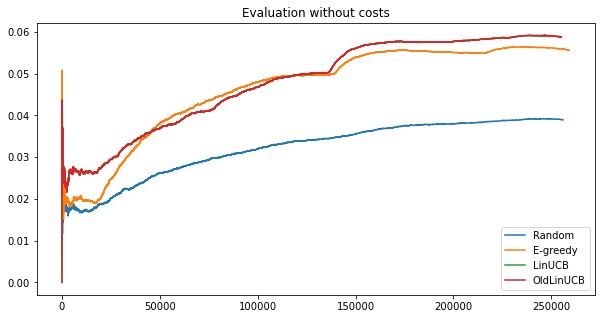

In [61]:
fig, ax = plt.subplots(1,1, figsize=(10, 5));

N = 50
ax.plot(ctr_random[N:], label='Random')
ax.plot(ctr_egreedy[N:], label='E-greedy')
ax.plot(ctr_linucb[N:], label='LinUCB')
ax.plot(old_ctr_linucb[N:], label='OldLinUCB')
ax.set_title('Evaluation without costs')

plt.legend();

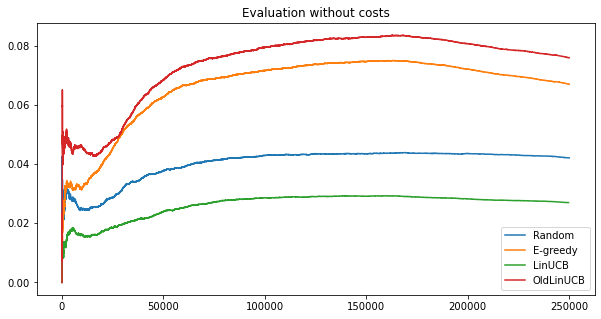

In [198]:
fig, ax = plt.subplots(1,1, figsize=(10, 5));


ax.plot(ctr_random, label='Random')
ax.plot(ctr_egreedy, label='E-greedy')
ax.plot(ctr_linucb, label='LinUCB')
ax.plot(old_ctr_linucb, label='OldLinUCB')
ax.set_title('Evaluation without costs')

plt.legend();

In [149]:
ctr_random_costs = evaluation.evaluate(p_random, data, bernoulli_costs, stop_after=NUM_OF_TRIALS)

Random policy with BernoulliCosts
Average reward: -0.4829
Execution time: 3.8s


In [151]:
ctr_egreedy_costs = evaluation.evaluate(egreedy, data, bernoulli_costs, stop_after=NUM_OF_TRIALS)

E-greedy(epsilon=0.2) with BernoulliCosts
Average reward: -0.4714
Execution time: 4.6s


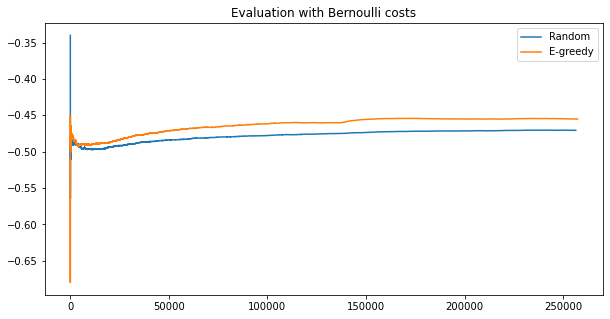

In [140]:
fig, ax = plt.subplots(1,1, figsize=(10, 5));


ax.plot(ctr_random_costs, label='Random')
ax.plot(ctr_egreedy_costs, label='E-greedy')
ax.set_title('Evaluation with Bernoulli costs')
plt.legend();